# Image Morphology
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-12-01

## Table of Contents
* Otsu's Method (Example)
* Otsu's Method
* Marker Detection

## Otsu's Method (Example)

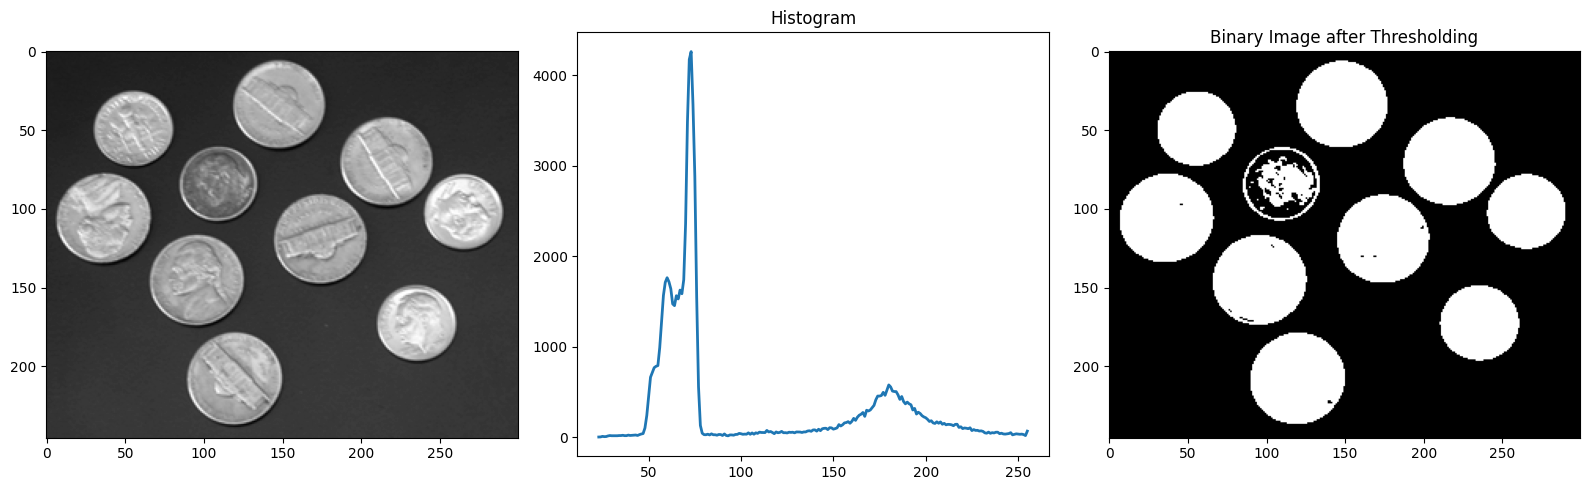

In [6]:
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import threshold_otsu
from skimage.exposure import histogram

# Read the image
gray_img = io.imread('coins.png')

# Compute Otsu's threshold
T = threshold_otsu(gray_img)

# Compute the histogram
hist, hist_centers = histogram(gray_img)

# Display the histogram and the binary image after thresholding
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Plot original image
axes[0].imshow(gray_img, cmap=plt.cm.gray)

# Plot histogram
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('Histogram')

# Show binary image
axes[2].imshow(gray_img > T, cmap=plt.cm.gray)
axes[2].set_title('Binary Image after Thresholding')

plt.tight_layout()
plt.show()


## Otsu's Method

W0 for k=2 is 0.417.
W1 for k=2 is 0.583.
uT for k=2 is 3.361.
u0 for k=2 is 1.467.
u1 for k=2 is 4.714.
sigma0 for k=2 is 0.249.
sigma1 for k=2 is 0.776.
sigmaT for k=2 is 3.120.
Check: 3.361 should be equal to uT.
Check: 3.120 should be equal to sigT.
W0 for k=4 is 0.639.
W1 for k=4 is 0.361.
uT for k=4 is 3.361.
u0 for k=4 is 2.261.
u1 for k=4 is 5.308.
sigma0 for k=4 is 1.410.
sigma1 for k=4 is 0.213.
sigmaT for k=4 is 3.120.
Check: 3.361 should be equal to uT.
Check: 3.120 should be equal to sigT.


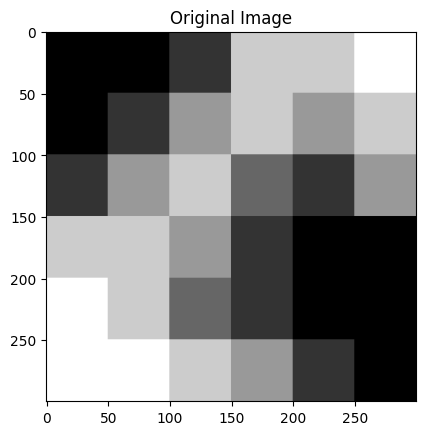

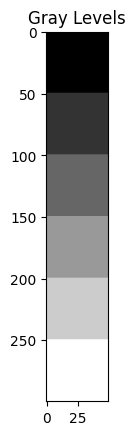

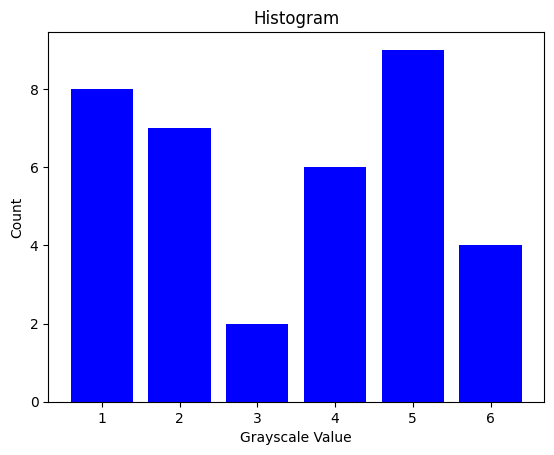

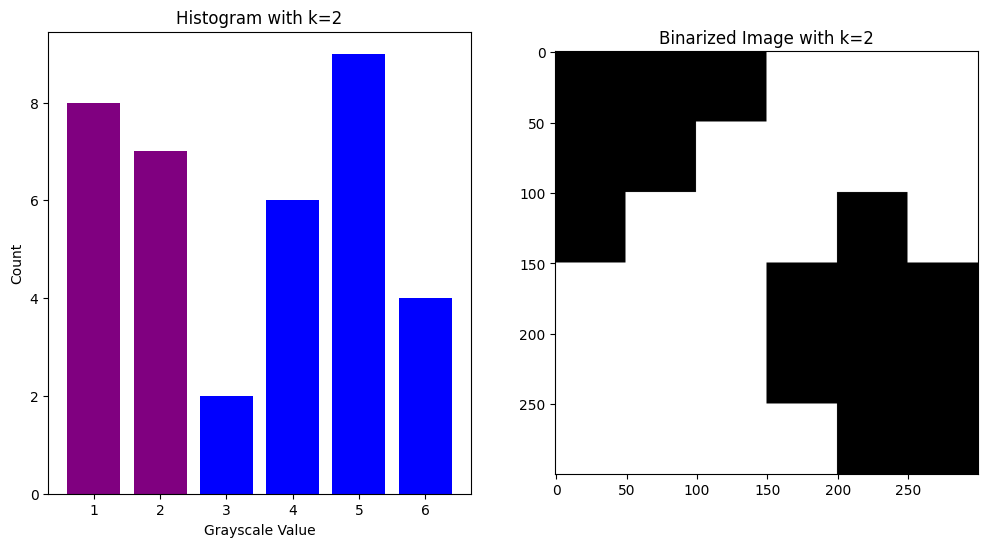

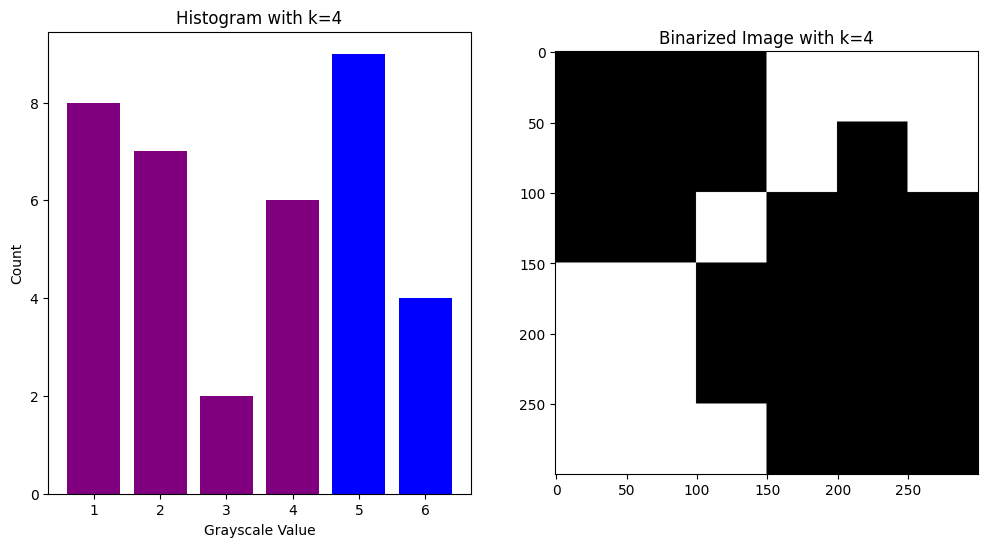

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the test image (6 level)
img = np.array([
    [1, 1, 2, 5, 5, 6],
    [1, 2, 4, 5, 4, 5],
    [2, 4, 5, 3, 2, 4],
    [5, 5, 4, 2, 1, 1],
    [6, 5, 3, 2, 1, 1],
    [6, 6, 5, 4, 2, 1]
])

# Number of gray levels
L = 6

# Calculate the size of the image
N = img.size

# Function to replicate elements for visualization
def repelem(arr, row_rep, col_rep):
    return np.repeat(np.repeat(arr, row_rep, axis=0), col_rep, axis=1)

# Visualize the original image
plt.figure()
plt.imshow(repelem(img, 50, 50), cmap='gray')
plt.title('Original Image')

# Visualize the gray levels
plt.figure()
plt.imshow(repelem(np.arange(1, L+1).reshape(L, 1), 50, 50), cmap='gray')
plt.title('Gray Levels')

# Compute histogram (ni)
ni = np.zeros(L)
for ii in range(L):
    ni[ii] = np.sum(img == (ii+1))

# Draw histogram
plt.figure()
plt.bar(np.arange(1, L+1), ni, color='blue')
plt.ylabel('Count')
plt.xlabel('Grayscale Value')
plt.title('Histogram')

# Probability distribution
pi = ni/N

# Functions for class occurrence and mean level
w0 = lambda k: np.sum(pi[:k])
w1 = lambda k: 1 - w0(k)
u0 = lambda k: np.sum(np.arange(1, k+1) * pi[:k]) / w0(k) if w0(k) > 0 else 0
u1 = lambda k: np.sum(np.arange(k+1, L+1) * pi[k:]) / w1(k) if w1(k) > 0 else 0
uT = np.sum(np.arange(1, L+1) * pi)

# Functions for class variance
sig0 = lambda k: np.sum(((np.arange(1, k+1) - u0(k))**2) * pi[:k]) / w0(k) if w0(k) > 0 else 0
sig1 = lambda k: np.sum(((np.arange(k+1, L+1) - u1(k))**2) * pi[k:]) / w1(k) if w1(k) > 0 else 0

# Otsu's method functions
sigW = lambda k: w0(k) * sig0(k) + w1(k) * sig1(k)
sigB = lambda k: w0(k) * w1(k) * (u0(k) - u1(k))**2

# Total class variance
sigT = np.sum(pi * ((np.arange(1, L+1) - uT)**2))

# Analyze for k=2 and k=4
for k in [2, 4]:
    print(f"W0 for k={k} is {w0(k):.3f}.")
    print(f"W1 for k={k} is {w1(k):.3f}.")
    print(f"uT for k={k} is {uT:.3f}.")
    print(f"u0 for k={k} is {u0(k):.3f}.")
    print(f"u1 for k={k} is {u1(k):.3f}.")
    print(f"sigma0 for k={k} is {sig0(k):.3f}.")
    print(f"sigma1 for k={k} is {sig1(k):.3f}.")
    print(f"sigmaT for k={k} is {sigT:.3f}.")
    print(f"Check: {u0(k)*w0(k) + u1(k)*w1(k):.3f} should be equal to uT.")
    print(f"Check: {sigW(k) + sigB(k):.3f} should be equal to sigT.")

# Create figures for histograms and binarized images
for k in [2, 4]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Histogram with class separation
    ax[0].bar(np.arange(1, L+1), ni, color=['purple' if i < k else 'blue' for i in range(L)])
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel('Grayscale Value')
    ax[0].set_title(f'Histogram with k={k}')

    # Binarized image
    imgBW = np.zeros_like(img)
    imgBW[img >= (k+1)] = 1
    ax[1].imshow(repelem(imgBW, 50, 50), cmap='gray')
    ax[1].set_title(f'Binarized Image with k={k}')

plt.show()
